    fips      unemp                 names
0      1  11.142493                 AZUAY
1      2   2.218927               BOLIVAR
2      3   3.535180                 CAÑAR
3      4   3.784140                CARCHI
4      5   2.390242              COTOPAXI
5      6   7.894610            CHIMBORAZO
6      7   4.430041                EL ORO
7      8   1.942097            ESMERALDAS
8      9   9.754878                GUAYAS
9     10   2.755401              IMBABURA
10    11   8.305561                  LOJA
11    12   1.885071              LOS RIOS
12    13   2.724696                MANABI
13    14   8.716140       MORONA SANTIAGO
14    15   8.389616                  NAPO
15    16   1.623658               PASTAZA
16    17   3.437341            TUNGURAHUA
17    18   4.489219             PICHINCHA
18    19   8.964073      ZAMORA CHINCHIPE
19    20   1.331112             GALAPAGOS
20    21   1.576863             SUCUMBIOS
21    22   7.958283              ORELLANA
22    23   5.797121         SANTO 

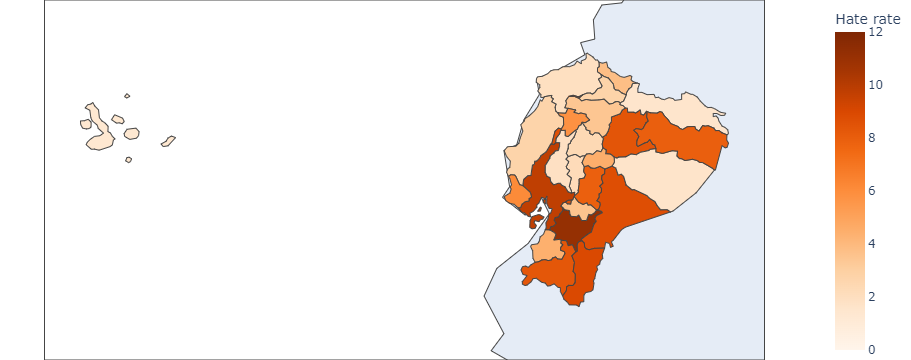

In [19]:
import json
import requests
import pandas as pd
import numpy as np
import plotly.express as px


polygons = requests.get(
    "https://raw.githubusercontent.com/jpmarindiaz/geo-collection/master/ecu/ecuador.geojson").json()

name_cantones  =  []
for i, a in enumerate(polygons['features']):
    name_cantones.append(a['properties']['nombre'])

id_pro = list(range(1, 25, 1))
id_pro.append(90)

df = pd.DataFrame(
    {"fips": id_pro, "unemp": np.random.uniform(0, 12, 25), "names": name_cantones}
)

print(df)
    
fig = px.choropleth(
    df,
    geojson=polygons,
    locations="fips",
    featureidkey="properties.codigo",
    color="unemp",
    color_continuous_scale="Oranges",
    range_color=(0, 12),
    # scope="europe",
    hover_name = "names",
    hover_data = ["names"],
    labels={"unemp": "Hate rate"},
)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})



fig.update_geos(fitbounds="locations", visible=True)
fig.show()
